In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.shape

(400, 5)

In [ ]:
df.drop('Gender', inplace=True, axis=1)

In [ ]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [ ]:
x

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000
...,...,...,...
395,15691863,46,41000
396,15706071,51,23000
397,15654296,50,20000
398,15755018,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
x_train, x_test

(      User ID  Age  EstimatedSalary
 250  15810075   44            39000
 63   15583681   32           120000
 312  15733964   38            50000
 159  15598840   32           135000
 283  15663249   52            21000
 ..        ...  ...              ...
 323  15619465   48            30000
 192  15779581   29            43000
 117  15591433   36            52000
 47   15776348   27            54000
 172  15794661   26           118000
 
 [300 rows x 3 columns],       User ID  Age  EstimatedSalary
 132  15725660   30            87000
 309  15652400   38            50000
 341  15776844   35            75000
 196  15738448   30            79000
 246  15638003   35            50000
 ..        ...  ...              ...
 146  15750839   27            96000
 135  15578006   23            63000
 390  15807837   48            33000
 264  15600379   48            90000
 364  15654456   42           104000
 
 [100 rows x 3 columns])

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [ ]:
std.mean_

array([1.56917163e+07, 3.81266667e+01, 6.95833333e+04])

In [ ]:
x_test

array([[ 4.78960539e-01, -8.04802115e-01,  5.04963926e-01],
       [-5.54771608e-01, -1.25440855e-02, -5.67782405e-01],
       [ 1.20119022e+00, -3.09640847e-01,  1.57046197e-01],
       [ 6.59405075e-01, -8.04802115e-01,  2.73018773e-01],
       [-7.57919871e-01, -3.09640847e-01, -5.67782405e-01],
       [ 1.72553483e+00, -1.10189888e+00, -1.43757673e+00],
       [-1.15107956e+00, -7.05769861e-01, -1.58254245e+00],
       [-1.57040131e-01, -2.10608593e-01,  2.15757314e+00],
       [-3.60879806e-01, -1.99318916e+00, -4.59058115e-02],
       [-9.76984730e-01,  8.78746198e-01, -7.70734413e-01],
       [-3.23319037e-02, -8.04802115e-01, -5.96775549e-01],
       [ 1.52879272e+00, -1.00286662e+00, -4.22816685e-01],
       [ 1.15325699e+00, -1.11576339e-01, -4.22816685e-01],
       [-1.58748780e+00,  8.64881682e-02,  2.15032485e-01],
       [ 7.67928607e-01, -1.79512465e+00,  4.75970782e-01],
       [ 1.37425498e+00, -6.06737608e-01,  1.37475825e+00],
       [ 9.71556625e-01, -1.11576339e-01

In [ ]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = lrmodel.predict(x_test)
score1 = accuracy_score(y_test, y_pred)
print("Model : Logistic Regression")
print("===========================")
print('Accuracy : {:0.2f}'. format(score1))

Model : Logistic Regression
Accuracy : 0.90


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(66, 2, 8, 24)

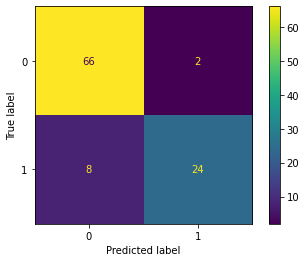

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()